In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
fname="ex_eosinophil.jpeg"
image=cv2.imread(fname)
#plt.imshow(image)

In [5]:
fname="ex_lymphocyte.jpeg"
image=cv2.imread(fname)
#plt.imshow(image)

In [6]:
fname="ex_monocyte.jpeg"
image=cv2.imread(fname)
#plt.imshow(image)

In [7]:
fname="ex_neutrophil.jpeg"
image=cv2.imread(fname)
#plt.imshow(image)

In [8]:
def image_array_centree(fname):
    image=cv2.imread(fname)
    #print("dimensions image originale",image.shape)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = np.array([100,50,50]) #100
    upper_red = np.array([160,255,255]) #140
    mask = cv2.inRange(hsv, lower_red, upper_red) 
    res = cv2.bitwise_and(image,image, mask= mask) 
    gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    rows,cols = gray_image.shape[0],gray_image.shape[1]
    ret,thresh = cv2.threshold(gray_image,127,255,0)
    M = cv2.moments(thresh)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    M = np.float32([[1,0,cols/2-cX],[0,1,rows/2-cY]])
    dst = cv2.warpAffine(gray_image,M,(cols,rows)) 
    imgr = cv2.resize(dst,(160,120))
    #print("dimensions image resizée",imgr.shape)
    return imgr

TypeError: Image data can not convert to float

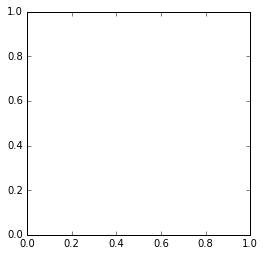

In [9]:
#fname="_0_7445.jpeg"
#fname="BloodImage_00015.jpg"
fname="ex1_eosinophil.jpeg"
image=cv2.imread(fname)
plt.imshow(image)
plt.show()
#fname="_0_563.jpeg"
imgr=image_array_centree(fname)
plt.imshow(imgr)

TypeError: Image data can not convert to float

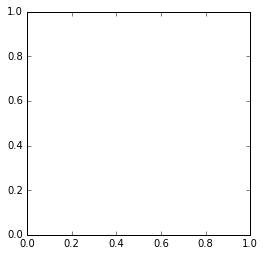

In [10]:
fname="ex1_lymphocyte.jpeg"
image=cv2.imread(fname)
plt.imshow(image)
plt.show()
imgr=image_array_centree(fname)
plt.imshow(imgr)

TypeError: Image data can not convert to float

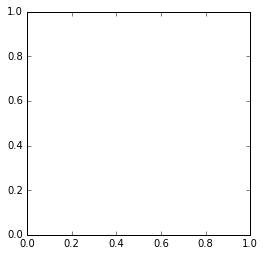

In [11]:
fname="ex1_monocyte.jpeg"
image=cv2.imread(fname)
plt.imshow(image)
plt.show()
imgr=image_array_centree(fname)
plt.imshow(imgr)

TypeError: Image data can not convert to float

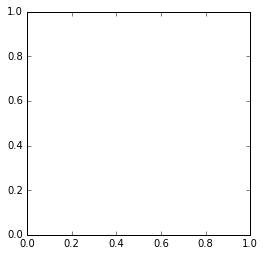

In [12]:
fname="ex1_neutrophil.jpeg"
image=cv2.imread(fname)
plt.imshow(image)
plt.show()
imgr=image_array_centree(fname)
plt.imshow(imgr)

In [13]:
imgr.shape

NameError: name 'imgr' is not defined

In [14]:
imgr.flatten().shape

NameError: name 'imgr' is not defined

In [13]:
def constituer_XY_listes(source_dir, valy):
    for fname in os.listdir(source_dir):
        src=os.path.join(source_dir,fname)
        #print(src)
        imgr=image_array_centree(src)
        imgr_array_plate=imgr.flatten()
        Xlist.append(imgr_array_plate)
        Ylist.append(valy)

In [14]:
Xlist=[]
Ylist=[]
source_dir='./TRAIN/EOSINOPHIL'
constituer_XY_listes(source_dir,0)
print("fini pour ",source_dir)
source_dir='./TRAIN/LYMPHOCYTE'
constituer_XY_listes(source_dir,1)
print("fini pour ",source_dir)
source_dir='./TRAIN/MONOCYTE'
constituer_XY_listes(source_dir,2)
print("fini pour ",source_dir)
source_dir='./TRAIN/NEUTROPHIL'
constituer_XY_listes(source_dir,3)
print("fini pour ",source_dir)

fini pour  ./TRAIN/EOSINOPHIL
fini pour  ./TRAIN/LYMPHOCYTE
fini pour  ./TRAIN/MONOCYTE
fini pour  ./TRAIN/NEUTROPHIL


In [15]:
len(Xlist), len(Ylist)

(9957, 9957)

In [16]:
max(Xlist[10])/255

0.7215686274509804

In [17]:
Ylist[8500]

3

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(Xlist)/255, np.array(Ylist), test_size=0.25, random_state=0)

In [19]:
len(X_test)

2490

In [20]:
#from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import timeit

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ("random forest accuracy: ",acc_rf)

random forest accuracy:  0.804417670682731


In [23]:
clf_rf = RandomForestClassifier()
scores = cross_val_score(clf_rf,np.array(Xlist)/255 , np.array(Ylist) , cv=5, scoring='f1_macro' )
print("random forest score moyen= ", scores.mean())

random forest score moyen=  0.7901460123046681


In [18]:
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print ("Linear SVM accuracy: ",acc_svm)

Linear SVM accuracy:  0.5048192771084338


In [19]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ("nearest neighbors accuracy: ",acc_knn)

nearest neighbors accuracy:  0.7132530120481928
